In [1]:
import pandas as pd
#from WindPy import w
import numpy as np
#w.start()





In [2]:
# 定义原始代码列表和需要移除的代码列表
original_codes = [
    "S.CBT"
    , "M.DCE", "Y.DCE", "P.DCE", "SB.NYB", "SR.CZC", "CT.NYB", "CF.CZC", "RM.CZC",
    "C.CBT", "C.DCE", "CS.DCE", "JD.DCE", "OI.CZC", "A.DCE", "LH.DCE", "PK.CZC", "RR.DCE",
    "BO.CBT", "SM.CBT", "W.CBT", "RR.CBT", "LC.CME", "LH.CME", "O.CBT", "YK.CBT", "YC.CBT",
    "YW.CBT", "FC.CME", "DA.CME", "OJ.NYB", "CC.NYB", "KC.NYB", "TT.NYM", "YO.NYM", "CJ.NYM",
    "KT.NYM", "BB.DCE", "FB.DCE", "RI.CZC", "LR.CZC", "JR.CZC", "PM.CZC", "WH.CZC", "RS.CZC",
    "B.DCE", "CJ.CZC", "CA.LME", "CU.SHF", "BC.INE", "HG.CMX", "ZS.LME", "ZN.SHF", "NI.LME",
    "NI.SHF", "RB.SHF", "AH.LME", "AL.SHF", "AO.SHF", "SN.LME", "SN.SHF", "PB.LME", "PB.SHF",
    "HC.SHF", "CO.LME", 
    "I.DCE"
    , "FEF.SG", "AA.LME", "LRAF.HK", "LRZF.HK", "LRSF.HK", "LRPF.HK",
    "LRNF.HK", "LRCF.HK", "SM.CZC", "SF.CZC", "SI.GFE", "WR.SHF", "SS.SHF", "SPTAUUSDOZ.IDC",
    "SPTAGUSDOZ.IDC", "GC.CMX", "SI.CMX", "AU.SHF", "AG.SHF", "AU(T+D).SGE", "AG(T+D).SGE",
    "AU9999.SGE", "SPTPTUSDOZ.IDC", "SPTPDUSDOZ.IDC", "PL.NYM", "PA.NYM", "MGC.CMX", "QO.CMX",
    "QI.CMX", "CL.NYM", "B.IPE", "T.IPE", "SC.INE", "LU.INE", "NG.NYM", "BU.SHF", "L.DCE", "PF.CZC",
    "TA.CZC", "PP.DCE", "EB.DCE", "RU.SHF", "NR.INE", "JM.DCE", "J.DCE", "ZC.CZC", "UR.CZC",
    "PG.DCE", "MA.CZC", "EG.DCE", "V.DCE", "FG.CZC", "SA.CZC", "SP.SHF", "RB.NYM", "HO.NYM",
    "QG.NYM", "QM.NYM", "N.IPE", "G.IPE", "BZ.NYM", "O.IPE", "ZE.CBT", "ATW.IPE", "AFR.IPE", "FU.SHF"
]





In [3]:
filtered_codes_by_oi_mean = []

# 存放OI均值大于100000的合约
filtered_codes_by_oi_mean = []

for code in original_codes:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    try:
        df = pd.read_csv(file_path)  # 尝试加载数据
        oi_mean = df['OI'].mean()  # 计算OI的均值
        if oi_mean > 100000:  # 判断OI均值是否大于100000
            filtered_codes_by_oi_mean.append(code)  # 如果是，则添加到筛选列表中
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到，跳过并继续。")  # 打印错误消息并继续


文件 SPTAUUSDOZ.IDC_weighted.csv 未找到，跳过并继续。


In [4]:
# 初始化一个空的DataFrame来存储所有统计值
all_describe = pd.DataFrame()

for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据
    stats = df.describe()  # 获取基本统计值
    
    # 调整stats DataFrame，使其包含合约代码作为一部分信息
    stats = stats.rename(columns=lambda x: f"{code}_{x}")
    
    # 将当前文件的统计值合并到总统计表中
    if all_describe.empty:
        all_describe = stats
    else:
        all_describe = pd.concat([all_describe, stats], axis=1)

# 打印合并后的统计表和加总的count值
print("合并后的统计表:")
print(all_describe)


合并后的统计表:
        S.CBT_OPEN   S.CBT_HIGH    S.CBT_LOW  S.CBT_CLOSE   S.CBT_VOLUME  \
count  1577.000000  1577.000000  1577.000000  1577.000000    1577.000000   
mean   1133.977612  1144.217322  1124.596238  1158.598403  206832.089410   
std     280.911254   284.680749   277.360904   238.633155   76566.749942   
min       0.000000     0.000000     0.000000   815.742051       0.000000   
25%     914.083212   919.781819   908.058605   918.456274  155564.000000   
50%    1094.193817  1133.929945  1091.499238  1157.173141  197250.000000   
75%    1362.078191  1373.784718  1345.294060  1366.009320  250082.000000   
max    1637.594930  1682.763724  1624.226996  1638.574742  737680.000000   

           S.CBT_OI   M.DCE_OPEN   M.DCE_HIGH    M.DCE_LOW  M.DCE_CLOSE  ...  \
count  1.577000e+03  1601.000000  1601.000000  1601.000000  1601.000000  ...   
mean   7.513130e+05  3250.870155  3277.744499  3223.816031  3251.645418  ...   
std    9.729950e+04   453.421118   461.578035   445.808282   454.6

In [5]:
# 初始化OI列的count加总值
total_oi_count = 0

# 通过列名筛选出所有的_OI列
oi_columns = [col for col in all_describe.columns if col.endswith('_OI')]

# 只从'all_describe'的'count'行中获取这些_OI列的值进行加总
total_oi_count = all_describe.loc['count', oi_columns].sum()

print(f"所有筛选后文件中OI列的count总和为: {total_oi_count}")


所有筛选后文件中OI列的count总和为: 101931.0


In [6]:
import pandas as pd
import numpy as np


for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据

    # 在替换之前计算NaN的数量
    initial_na_count = df.isna().sum().sum()

    # 将所有的0值替换为NaN
    df.replace(0, np.nan, inplace=True)

    # 替换之后计算NaN的数量
    post_replace_na_count = df.isna().sum().sum()

    # 计算替换操作增加的NaN数量
    replaced_na_count = post_replace_na_count - initial_na_count

    # 报告替换了多少个NaN
   # print(f"文件 {code} 替换了 {replaced_na_count} 个0值为NaN。")


In [7]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import talib

def create_labels(df, col_name, window_size=11):
    """
    Data is labeled as per the logic in research paper
    Label code: BUY => 1, SELL => 0, HOLD => 2
    params:
        df => Dataframe with data
        col_name => name of column which should be used to determine strategy
    returns: numpy array with integer codes for labels with
             size = total-(window_size)+1
    """
    print("Calculating labels")
    total_rows = len(df)
    labels = np.zeros(total_rows)
    labels[:] = np.nan
    pbar = tqdm(total=total_rows)
    row_counter = 0

    while row_counter < total_rows:
        if row_counter >= window_size - 1:
            window_begin = row_counter - (window_size - 1)
            window_end = row_counter
            window_middle = int((window_begin + window_end) / 2)

            min_ = np.inf
            min_index = -1
            max_ = -np.inf
            max_index = -1
            for i in range(window_begin, window_end + 1):
                price = df.iloc[i][col_name]
                if price < min_:
                    min_ = price
                    min_index = i
                if price > max_:
                    max_ = price
                    max_index = i

            if max_index == window_middle:
                labels[window_middle] = 0
            elif min_index == window_middle:
                labels[window_middle] = 1
            else:
                labels[window_middle] = 2

        row_counter += 1
        pbar.update(1)
    pbar.close()
    return labels

In [55]:
import pandas as pd
import talib

#for code in filtered_codes_by_oi_mean:
for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据

    # 将所有的0值替换为NaN
    df.replace(0, np.nan, inplace=True)
    
    df = df.sort_index(ascending=True)
    # 计算SMA 20日移动平均
    df['SMA_20'] = talib.SMA(df['CLOSE'], timeperiod=20)

     # 计算SMA 20日移动平均
    df['SMA_100'] = talib.SMA(df['CLOSE'], timeperiod=100)

     # 计算SMA 20日移动平均
    df['SMA_200'] = talib.SMA(df['CLOSE'], timeperiod=200)
    
    
    # 计算RSI 14日相对强弱指数
    df['RSI_14'] = talib.RSI(df['CLOSE'], timeperiod=14)

    # 计算RSI 14日相对强弱指数
    df['RSI_30'] = talib.RSI(df['CLOSE'], timeperiod=30)
    
    # 计算布林带
    df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['CLOSE'], timeperiod=40, nbdevup=2, nbdevdn=2, matype=0)
    
    # MACD
    df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['CLOSE'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # On-Balance Volume
    df['obv'] = talib.OBV(df['CLOSE'], df['VOLUME'])
    
    # Average True Range
    df['atr'] = talib.ATR(df['HIGH'], df['LOW'], df['CLOSE'], timeperiod=14)
    
    df['label'] = create_labels(df, 'CLOSE', window_size=11)
    
    df_cleaned = df.dropna()
    
    df_cleaned.to_csv(f"{code}_technical.csv", index=False)





Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1044.34it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1178.47it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1170.13it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1192.48it/s]


Calculating labels


100%|██████████| 1575/1575 [00:01<00:00, 1187.71it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1087.02it/s]


Calculating labels


100%|██████████| 1575/1575 [00:01<00:00, 1183.96it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1015.10it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1168.71it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1200.96it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1212.74it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1195.05it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1181.27it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1098.32it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1023.61it/s]


Calculating labels


100%|██████████| 777/777 [00:00<00:00, 1201.32it/s]


Calculating labels


100%|██████████| 761/761 [00:00<00:00, 1165.79it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1156.87it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1114.39it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1196.93it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1206.79it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1106.17it/s]


Calculating labels


100%|██████████| 1575/1575 [00:01<00:00, 1212.59it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1212.47it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1220.49it/s]


Calculating labels


100%|██████████| 1578/1578 [00:01<00:00, 1076.07it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1204.45it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1188.10it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1116.40it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1133.26it/s]


Calculating labels


100%|██████████| 186/186 [00:00<00:00, 1268.17it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1177.25it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1190.76it/s]


Calculating labels


100%|██████████| 1592/1592 [00:01<00:00, 1031.77it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1209.70it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1202.05it/s]


Calculating labels


100%|██████████| 303/303 [00:00<00:00, 1228.21it/s]


Calculating labels


100%|██████████| 1089/1089 [00:00<00:00, 1212.41it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1068.35it/s]


Calculating labels


100%|██████████| 1579/1579 [00:01<00:00, 1214.46it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1217.89it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1219.36it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1071.65it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1178.87it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1179.10it/s]


Calculating labels


100%|██████████| 912/912 [00:00<00:00, 1232.48it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1058.49it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1148.12it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1190.15it/s]


Calculating labels


100%|██████████| 840/840 [00:00<00:00, 1127.18it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1050.04it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1182.36it/s]


Calculating labels


100%|██████████| 1088/1088 [00:00<00:00, 1168.23it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1205.88it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1076.53it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1187.80it/s]


Calculating labels


100%|██████████| 1258/1258 [00:01<00:00, 1140.86it/s]


Calculating labels


100%|██████████| 1121/1121 [00:00<00:00, 1177.38it/s]


Calculating labels


100%|██████████| 968/968 [00:00<00:00, 1174.88it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1068.57it/s]


Calculating labels


100%|██████████| 1283/1283 [00:01<00:00, 1193.92it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1176.73it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1081.55it/s]


Calculating labels


100%|██████████| 1042/1042 [00:00<00:00, 1213.33it/s]


Calculating labels


100%|██████████| 1292/1292 [00:01<00:00, 1202.61it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1200.84it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1184.76it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1111.44it/s]


Calculating labels


100%|██████████| 1579/1579 [00:01<00:00, 1207.38it/s]


Calculating labels


100%|██████████| 1404/1404 [00:01<00:00, 1179.74it/s]


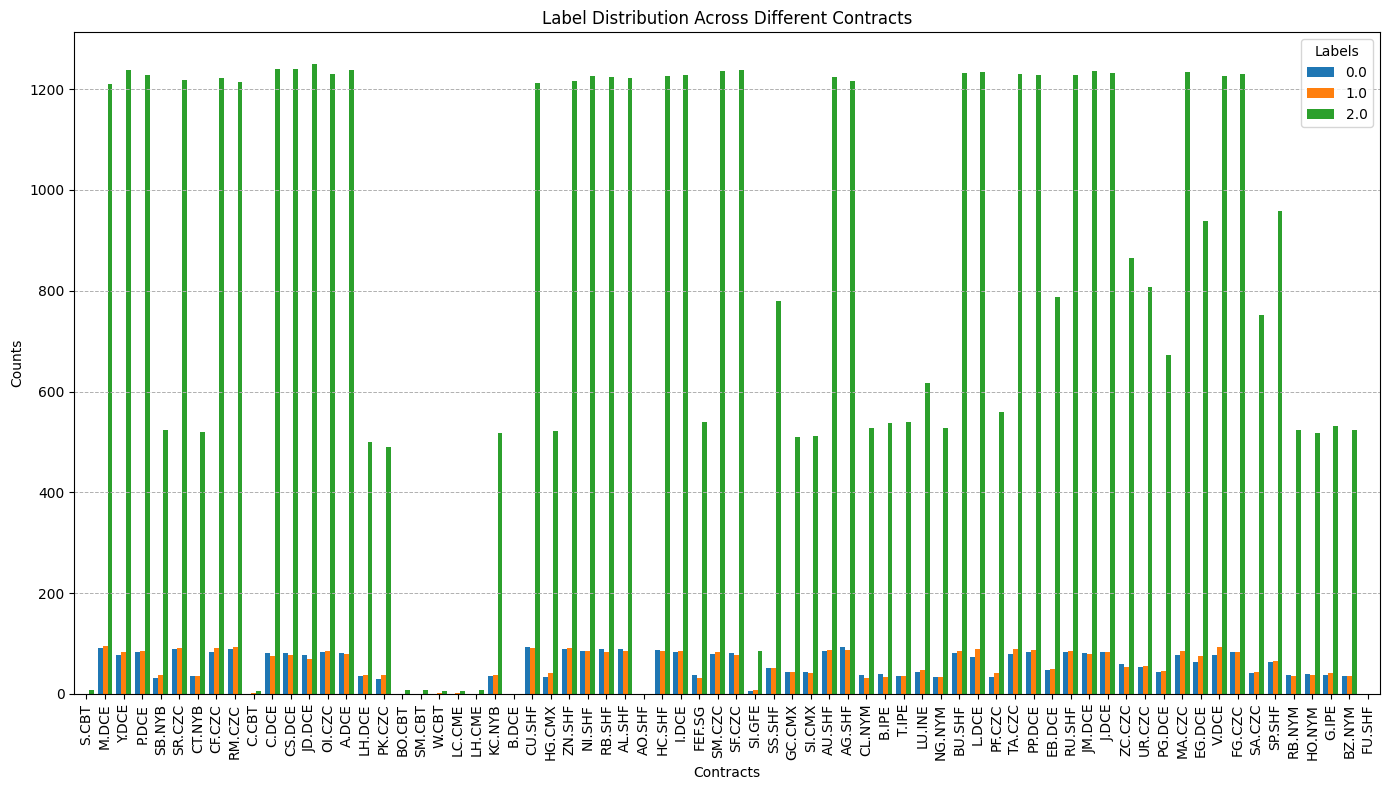

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化一个空字典来存储每个合约的标签分布
label_distributions = {}

# 遍历每个合约代码，加载数据，计算标签分布
for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_technical.csv"  # 假设标签数据保存在这些文件中
    data = pd.read_csv(file_path)
    label_distribution = data['label'].value_counts()  # 计算标签的绝对数
    label_distributions[code] = label_distribution

# 创建一个新的DataFrame来存储所有合约的标签分布数据
df_distributions = pd.DataFrame(label_distributions).T.fillna(0)

# 绘制条形图
df_distributions.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Label Distribution Across Different Contracts')
plt.ylabel('Counts')
plt.xlabel('Contracts')
plt.legend(title='Labels')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# 初始化存储容器
scalers = {}  # 用于存储每个品种的scaler
all_X_train = []
all_X_test = []
all_y_train = []
all_y_test = []
all_dates = []  # 保存每个样本的日期范围
all_varieties = []  # 保存每个样本的品种信息

lookback_days = 20

for code in  filtered_codes_by_oi_mean:
    file_path = f"{code}_technical.csv"
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到，跳过此文件。")
        continue

    # 转换第一列为日期格式并按日期排序
    data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
    data = data.sort_values(data.columns[0])

    if len(data) < lookback_days:  # 如果数据量小于回溯天数
        print(f"数据集 {code} 太小，无法创建有效的训练集。跳过此数据集。")
        continue
        
    # 添加品种代码作为特征
    data['Variety'] = code

    features = []
    labels = []
    
    # 选择除了标签、变化百分比和日期之外的所有列作为特征
    feature_columns = data.columns[1:-2]

    # 创建输入-输出对
    for i in range(lookback_days, len(data)):
        window = data.iloc[i - lookback_days:i][feature_columns].values
        label = data.iloc[i, -2]
        features.append(window)
        labels.append(label)
        start_date = data.iloc[i - lookback_days, 0]  # 起始日期
        all_dates.append(start_date.strftime('%Y-%m-%d'))  # 转换为字符串格式
        all_varieties.append(code)  # 保存品种
        
    X = np.array(features)
    y = np.array(labels)

    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

    # 初始化StandardScaler
    scaler =MinMaxScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)
    
     # 添加一个额外的维度以表示单通道
    X_train_scaled = X_train_scaled.reshape((*X_train_scaled.shape, 1))
    X_test_scaled = X_test_scaled.reshape((*X_test_scaled.shape, 1))
    
    # 保存scaler
    scalers[code] = scaler
    
    # 将处理后的数据添加到列表中
    all_X_train.append(X_train_scaled)
    all_X_test.append(X_test_scaled)
    all_y_train.append(y_train)
    all_y_test.append(y_test)

# 使用np.concatenate来合并数据
X_train_combined = np.concatenate(all_X_train, axis=0)
X_test_combined = np.concatenate(all_X_test, axis=0)
y_train_combined = np.concatenate(all_y_train, axis=0)
y_test_combined = np.concatenate(all_y_test, axis=0)

数据集 S.CBT 太小，无法创建有效的训练集。跳过此数据集。
数据集 C.CBT 太小，无法创建有效的训练集。跳过此数据集。
数据集 BO.CBT 太小，无法创建有效的训练集。跳过此数据集。
数据集 SM.CBT 太小，无法创建有效的训练集。跳过此数据集。
数据集 W.CBT 太小，无法创建有效的训练集。跳过此数据集。
数据集 LC.CME 太小，无法创建有效的训练集。跳过此数据集。
数据集 LH.CME 太小，无法创建有效的训练集。跳过此数据集。
数据集 B.DCE 太小，无法创建有效的训练集。跳过此数据集。
数据集 AO.SHF 太小，无法创建有效的训练集。跳过此数据集。
数据集 FU.SHF 太小，无法创建有效的训练集。跳过此数据集。


In [58]:
# Check the shapes of the resulting arrays
X_train_combined.shape, X_test_combined.shape, y_train_combined.shape, y_test_combined.shape

((43690, 20, 19, 1), (18785, 20, 19, 1), (43690,), (18785,))

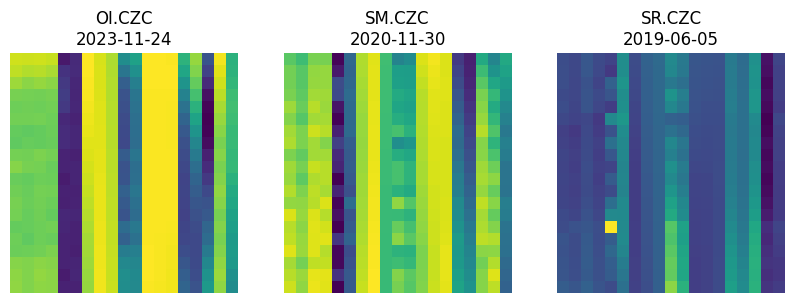

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# 随机选择三个样本的索引
indices = np.random.choice(X_train_combined.shape[0], 3, replace=False)

# 创建一个图和三个子图 (axs) 的网格
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# 遍历所选的每个索引和对应的子图
for i, ax in zip(indices, axs.flatten()):
    # 从训练集中获取对应的样本
    # 注意: 我们需要使用squeeze()方法去掉大小为1的维度，使得imshow能够正常工作
    image = X_train_combined[i].squeeze()
    
    # 使用灰度色彩映射显示图像
    ax.imshow(image, cmap='viridis')
    
    title = f'{all_varieties[i]}\n{all_dates[i]}'
    # 设置图像的标题为样本的索引
    ax.set_title(title)
    
    # 关闭坐标轴显示
    ax.axis('off')

# 显示图像
plt.show()


In [60]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

def get_sample_weights(y):
    """
    计算基于类权重的样本权重。用于处理不平衡数据和一热编码预测的模型。

    参数:
        y: 类标签为整数
    """

    y_int = y.astype(int)  # compute_class_weight需要整数标签
    class_weights = compute_class_weight('balanced', classes=np.unique(y_int), y=y_int)

    print("真实类权重为 {}".format(class_weights), np.unique(y_int))
    print("值计数", np.unique(y_int, return_counts=True))
    
    sample_weights = np.array([class_weights[class_label] for class_label in y_int])

    return sample_weights
    
sample_weights =  get_sample_weights(y_train_combined)


真实类权重为 [5.56915233 5.44016934 0.37927323] [0 1 2]
值计数 (array([0, 1, 2]), array([ 2615,  2677, 38398], dtype=int64))


In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader


#  y_train_combined 和 y_test_combined 已经是整数标签
y_train_tensor = torch.tensor(y_train_combined, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_combined, dtype=torch.long)
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)

X_train_tensor = X_train_tensor.permute(0, 3, 1, 2)  # 从 [batch, height, width, channels] 转换为 [batch, channels, height, width]
X_test_tensor = X_test_tensor.permute(0, 3, 1, 2)    # 同上

# 然后创建TensorDataset和DataLoader，如之前所示


# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


In [64]:
print(f"Training samples: {len(train_dataset)}, Batches: {len(train_loader)}")
print(f"Testing samples: {len(test_dataset)}, Batches: {len(test_loader)}")

Training samples: 43690, Batches: 682
Testing samples: 18785, Batches: 293


In [68]:

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # 假设输入通道为1
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 *5 * 4, 120)  # 根据池化层后的维度调整
        self.fc2 = nn.Linear(120, 3)  # 有3个类别
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 4)  # 调整尺寸以匹配全连接层的输入
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [69]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

# 假设X_train_tensor, y_train_tensor已经准备好
# sample_weights是从您的get_sample_weights函数计算得到的

# 将样本权重转换为Tensor
sample_weights_tensor = torch.from_numpy(sample_weights).double()

# 使用WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights_tensor, len(sample_weights_tensor), replacement=True)

# 创建TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# 创建带有sampler的DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, sampler=sampler)

# 实例化模型、定义损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 128
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.1843363046646118
Epoch 2, Loss: 0.9001965522766113
Epoch 3, Loss: 0.873399019241333
Epoch 4, Loss: 0.7811712622642517
Epoch 5, Loss: 0.9382631182670593
Epoch 6, Loss: 0.9037982225418091
Epoch 7, Loss: 0.7754673957824707
Epoch 8, Loss: 0.7971494793891907
Epoch 9, Loss: 0.8619864583015442
Epoch 10, Loss: 0.9466421008110046
Epoch 11, Loss: 0.8775619268417358
Epoch 12, Loss: 0.8198288679122925
Epoch 13, Loss: 0.9149169921875
Epoch 14, Loss: 0.7599552869796753
Epoch 15, Loss: 0.6766330003738403
Epoch 16, Loss: 0.7442353367805481
Epoch 17, Loss: 0.6500023007392883
Epoch 18, Loss: 0.8241535425186157
Epoch 19, Loss: 0.6967796683311462
Epoch 20, Loss: 0.7673464417457581
Epoch 21, Loss: 0.8439542055130005
Epoch 22, Loss: 0.6070125102996826
Epoch 23, Loss: 0.7872725129127502
Epoch 24, Loss: 0.7554147839546204
Epoch 25, Loss: 0.7606785893440247
Epoch 26, Loss: 0.8012162446975708
Epoch 27, Loss: 0.7605980038642883
Epoch 28, Loss: 0.6716945171356201
Epoch 29, Loss: 0.745812654495239

In [70]:
model.eval()  # 设置模型为评估模式
correct = 0
total = 0
with torch.no_grad():  # 在评估阶段不计算梯度
    for data, targets in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Accuracy on test set: {accuracy:.4f}')


Accuracy on test set: 0.6859


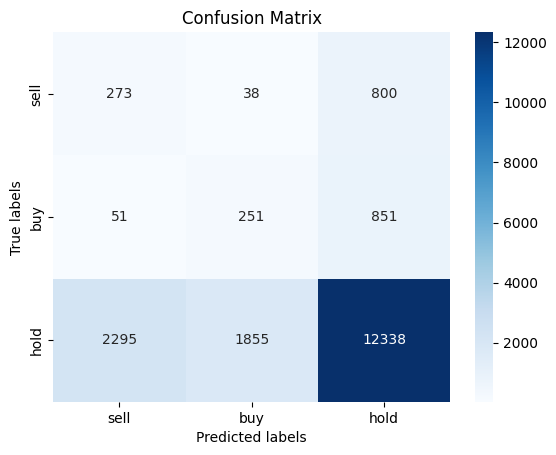

In [71]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 确保模型处于评估模式
model.eval()

# 收集所有预测和标签
all_preds = []
all_targets = []

with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# 计算混淆矩阵
cm = confusion_matrix(all_targets, all_preds)

# 假设您知道每个整数标签对应的原始类别名称
original_classes = ['sell', 'buy', 'hold']

# 直接使用原始类别名称作为混淆矩阵的轴标签
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=original_classes, yticklabels=original_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
